# Проект: Исследование стартапов
- Автор: Горлов Георгий
- Дата: 21.03.2025

## Введение
### Цели и задачи проекта
Цель проекта: для финансовой компании провести исследовательский анализ исторических данных, относящихся к инвестиционному рынку. Выроботать общее понимание, какие данные могут быть полезны для покупики, развития и перепродажи перспективных стартапов.



### Содержимое проекта
1. [Знакомство с данными: загрузка и первичная предобработка](#1)
2. [Предобработка данных, предварительное исследование](#2)
3. [Исследовательский анализ объединённых таблиц](#3)
4. [Итоговый вывод и рекомендации](#4)


<a id ='1'></a>
## Шаг 1. Знакомство с данными: загрузка и первичная предобработка


### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем нужные бибилиотеки для проекта
# Принудительно запрещаем вывод предупреждений 
import warnings
warnings.filterwarnings("ignore")

# Импортируем библиотеку numpy
import numpy as np

# Импортируем библиотеку pandas
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

Загрузим датасеты `company_and_rounds.csv`, `acquisition.csv`, `people.csv`, `education.csv` и `degrees.csv`

In [2]:
# Содержит информацию о компаниях и раундах финансирования
car_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

# Содержит информацию о покупках одними компаниями других компаний
acq_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

# Содержит информацию о сотрудниках
ppl_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

# Содержит информацию об образовании сотрудника
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

# Содержит информацию о типе образования сотрудника
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

Проверим общую информацию о каждом датасете и просмотрим на их данные

In [3]:
# Рассмотрим информацию о датасете company_and_rounds
car_df.info()
car_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Рассмотрим информацию о датасете acquisition
acq_df.info()
acq_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Столбцам `id`, `acquiring_company_id` и `acquired_company_id` можно уменьшит разрядность типа данных `int`. Столбец `acquired_at` можно привести к типу данных `datetime`.

In [5]:
# Рассмотрим информацию о датасете people.csv
ppl_df.info()
ppl_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [6]:
# Рассмотрим информацию о датасете education.csv
education_df.info()
education_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


**Снизить разрядность первых столбцов, привести столбец с датами к корректному типу данных**

In [7]:
# Рассмотрим информацию о датасете degrees.csv
degrees_df.info()
degrees_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


**Снизить разрядность первого столбца**

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Заменим пробелы на нижние подчеркивание в названиях столбцов в датасете company_and_rounds.


In [8]:
car_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [9]:
# Заменяем двойные пробелы на подчеркивания
car_df.columns = car_df.columns.str.replace('  ',' ').str.replace(' ','_')
car_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Поменяем в датасетах тип данных у столбцов, содержащих дату:

In [10]:
# Приводим столбцы с датой в датасете company_and_rounds к корректному типу данных 
for column in car_df[['founded_at','closed_at','funded_at']]:
    car_df[column] = pd.to_datetime(car_df[column],format = '%Y-%m-%d')
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [11]:
# Приводим столбцы с датой в датасете acquisition к корректному типу данных 
for column in acq_df[['acquired_at']]:
    acq_df[column] = pd.to_datetime(acq_df[column],format = '%Y-%m-%d')
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [12]:
# Приводим столбцы с датой в датасете education к корректному типу данных 
for column in education_df[['graduated_at']]:
    education_df[column] = pd.to_datetime(education_df[column],format = '%Y-%m-%d')
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


___
Количество отсутствующих данных умеренное. Только в датасете `company_and_rounds` 9 столбцов заполнены примерно на 1/4 от всех строк датасета. Столбец `closed_at` в этом же датасете хранит  информацию о закрытии компании и пропуски в ней могут говорить о том, что компании ещё не закрылись. В некоторых датасетах количество пропусков незначительно, в других присутствуют столбцы с отсутствующими значениями больше 50% от всех строк. В целом, провести анализ по такому количеству имеющихся данных возможно. Но результат анализа таких данных может быть неоднозначным.
___

<a id='2'></a>
## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [13]:
# Выведем первые строки датасета
car_df.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Создадим сводную таблицу с количество инвестиционных ранудов  и объемом финансирования
pivot = car_df.pivot_table(index = car_df['funded_at'].dt.year, 
                           values = ['raised_amount','investment_rounds'],aggfunc = {'raised_amount':['median','count']})
pivot

raised_amount           
                  count     median
funded_at                         
1960.0                9        0.0
1973.0                1        0.0
1974.0                2        0.0
1984.0                3    41000.0
1985.0                1        0.0
1987.0                2  1250000.0
1989.0                1    15000.0
1990.0                1  1000000.0
1992.0                1  2000000.0
1993.0                2    62500.0
1994.0                2  6700000.0
1995.0                7  2000000.0
1996.0                7    12500.0
1997.0                9  3300000.0
1998.0               29   100000.0
1999.0               76  2000000.0
2000.0              125  4200000.0
2001.0               96  3000000.0
2002.0              116  4200000.0
2003.0              159  3000000.0
2004.0              291  5000000.0
2005.0             1633  5500000.0
2006.0             2436  5000000.0
2007.0             3279  3973320.0
2008.0             3774  3110000.0
2009.0             4151  2000000.0
2010.0             6221  1602500.0
2011.0             9204  1200000.0
2012.0             9970  1000000.0
2013.0            11072  1200000.0

In [15]:
# Отбираем года, где было больше 50 инвестиционных раундов
filltered_pivot = pivot[pivot['raised_amount']['count'] > 50]
#filltered_pivot['invest_per_round'] = filltered_pivot['raised_amount']/filltered_pivot['investment_rounds']


In [16]:
filltered_pivot

raised_amount           
                  count     median
funded_at                         
1999.0               76  2000000.0
2000.0              125  4200000.0
2001.0               96  3000000.0
2002.0              116  4200000.0
2003.0              159  3000000.0
2004.0              291  5000000.0
2005.0             1633  5500000.0
2006.0             2436  5000000.0
2007.0             3279  3973320.0
2008.0             3774  3110000.0
2009.0             4151  2000000.0
2010.0             6221  1602500.0
2011.0             9204  1200000.0
2012.0             9970  1000000.0
2013.0            11072  1200000.0

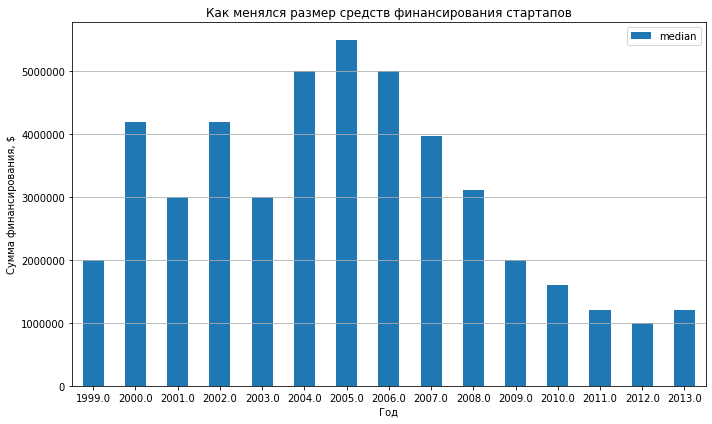

In [17]:
# Создадим столбчатую диаграмму с объемами финансирования по годам
filltered_pivot['raised_amount']['median'].plot(kind='bar',title='Как менялся размер средств финансирования стартапов',
                               figsize=(10,6),
                              xlabel='Год',
                              rot = 0,
                              ylabel='Сумма финансирования, $',
                              legend=True,
                                )

plt.ticklabel_format(axis='y', style='plain') 
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [18]:
new_filltered_pivot=filltered_pivot.reset_index()
# Создадим скользящую среднюю для отображения на диаграмме
new_filltered_pivot['moving_average'] = new_filltered_pivot['raised_amount']['median'].rolling(window=2).mean()

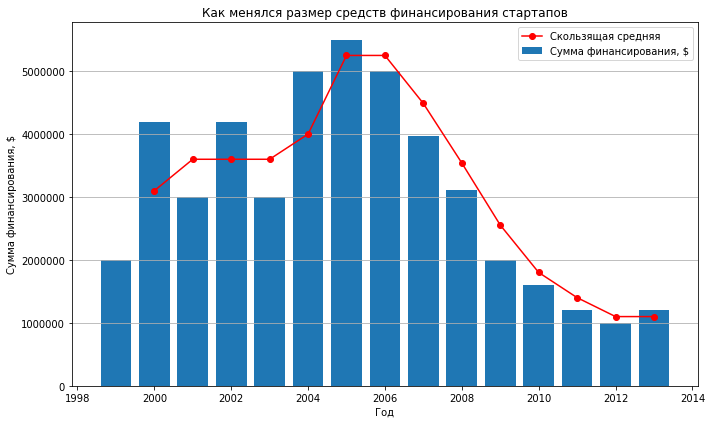

In [19]:
# Создадим схожий график, имеющий скользящую среднюю
plt.figure(figsize=(10,6))
plt.bar(new_filltered_pivot['funded_at'],new_filltered_pivot['raised_amount']['median'],label = 'Сумма финансирования, $')
plt.plot(new_filltered_pivot['funded_at'],new_filltered_pivot['moving_average'],
         color='red', marker='o', label='Скользящая средняя')

plt.xlabel('Год')
plt.ylabel('Сумма финансирования, $')
plt.title('Как менялся размер средств финансирования стартапов')
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.grid(axis='y')
plt.legend()

___
- В 2005 году был наибольший типичный  размер финансирования в рамках одного раунда - 5.500.000.0 долларов.
- В 2007 году началась тенденция на сокрящение суммы финансирования. При этом количество инвестиционных раундов продолжало увеличиватся.
- В рамках тенденции, в 2013 году типичный размер финанансирования увеличился на 20%, в сравнении с предыдущем годом. В 2012 году типичный размер финансирования состовлял 1.000.000 долларов, а в 2013 - 1.200.000 долларов.
___


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [20]:
ppl_df

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs


In [21]:
education_df

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT
...,...,...,...,...
109605,109606,268589,American Institute of Certtified Public Accoun...,NaT
109606,109607,268527,South China University of Technology,NaT
109607,109608,268527,Clarkson University,NaT
109608,109609,268528,Colorado State University,NaT


In [22]:
degrees_df

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering



Присоединение таблицы `degrees` возможно для выполнения задания. Для этого нужно привести данные `object_id` сотрудников из таблицы `degrees` к похожему виду из столбцов `people` и `education`. При этом стоит заметить, что данны датасета `degrees` имеют уточняющий характер и новой важной информации могут не нести.


In [23]:
#degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:','').astype('int64')

In [24]:
merged_df = ppl_df.merge(education_df,left_on='id',right_on='person_id',how='left',suffixes = ('_people','__education'))
merged_df


,id_people,first_name,last_name,company_id,network_username,id__education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


In [25]:
# Доля пропущенных значений в столбце с информацией об институте
a = round(100*merged_df['instituition'].isna().mean(),2)
print(f'Доля пропущенных значений в столбце об институте составляет {a} %')

Доля пропущенных значений в столбце об институте составляет 59.28 %


In [26]:
# Оценим количество компаний по численности сотрудников
workers_info = merged_df.groupby('company_id')['id_people'].nunique().reset_index()
workers_info

,company_id,id_people
0,1.0,2
1,2.0,1
2,3.0,3
3,4.0,13
4,5.0,61
...,...,...
22917,285897.0,2
22918,285953.0,1
22919,285972.0,2
22920,285996.0,1


In [27]:
# Создадим столбец-маркер для строк с сотрудниками без информации о образовании
merged_df['no_institution'] = merged_df['instituition'].isna().astype('int64')

In [28]:
# Сгруппируем данные и покажем количество сотрудников и количество сотрудников без информации об образовании
workers_info = merged_df.groupby('company_id').agg(workers_count=('id_people', 'nunique'),
                                                    no_education=('no_institution', 'sum')).reset_index()
workers_info

,company_id,workers_count,no_education
0,1.0,2,1
1,2.0,1,0
2,3.0,3,1
3,4.0,13,1
4,5.0,61,16
...,...,...,...
22917,285897.0,2,0
22918,285953.0,1,1
22919,285972.0,2,1
22920,285996.0,1,0


In [29]:
# Вычисляем долю сотрудников с пропущенными данными об образовании в каждой компании
workers_info['no_education_share'] = round(workers_info['no_education']/workers_info['workers_count'],2)
workers_info

,company_id,workers_count,no_education,no_education_share
0,1.0,2,1,0.50
1,2.0,1,0,0.00
2,3.0,3,1,0.33
3,4.0,13,1,0.08
4,5.0,61,16,0.26
...,...,...,...,...
22917,285897.0,2,0,0.00
22918,285953.0,1,1,1.00
22919,285972.0,2,1,0.50
22920,285996.0,1,0,0.00


In [30]:
# Посмотрим на распредение компаний по количеству сотрудников
workers_info[['workers_count']].value_counts()

workers_count
1                18117
2                 2709
3                  921
4                  450
5                  237
6                  138
7                  100
8                   59
9                   46
11                  30
10                  25
13                  17
12                  16
14                   8
17                   5
16                   4
15                   3
18                   3
19                   3
20                   3
23                   3
29                   2
56                   2
21                   2
22                   2
25                   2
26                   1
51                   1
150                  1
138                  1
72                   1
63                   1
61                   1
48                   1
47                   1
39                   1
36                   1
35                   1
32                   1
31                   1
244                  1
dtype: int64

Группы были выбраны с учётом того, что большая часть компаний, по данным, состоят из одного человека. Также частым явлением является компания из 2 или 3 человек. С ростом численности человек в  компании уменьшается само количество компаний. Компаний,где численность число сотрудников 12+, несопастовимо меньше. Поэтому было решено категоризировать компании следующим образом: 

In [31]:
# Категоризируем данные
workers_info['company_size'] = pd.cut(workers_info['workers_count'], bins=[0, 1, 2, 3, 5, 10, 25, float('inf')], 
                                          labels=['1', '2', '3', '4-5', '6-10', '11-25', '26+'])
workers_info

,company_id,workers_count,no_education,no_education_share,company_size
0,1.0,2,1,0.50,2
1,2.0,1,0,0.00,1
2,3.0,3,1,0.33,3
3,4.0,13,1,0.08,11-25
4,5.0,61,16,0.26,26+
...,...,...,...,...,...
22917,285897.0,2,0,0.00,2
22918,285953.0,1,1,1.00,1
22919,285972.0,2,1,0.50,2
22920,285996.0,1,0,0.00,1


In [32]:
# Создадим сводную таблицу по категориям компаний
new_workers_info =  workers_info.pivot_table(index='company_size',values=['workers_count','no_education_share','company_id']
                        , aggfunc = {'workers_count':'sum',
                                    'no_education_share':'mean',
                                    'company_id':'nunique'})
new_workers_info.columns = ['unqiue_company','avg_no_education_share','workers_count']
new_workers_info

,unqiue_company,avg_no_education_share,workers_count
company_size,,,
1,18117,0.463377,18117
2,2709,0.466962,5418
3,921,0.487818,2763
4-5,687,0.497962,2985
6-10,368,0.532853,2664
11-25,101,0.459406,1425
26+,19,0.268421,1243


___
- Над большей частью стартапов работают команды из одного человека.
- Присоединение таблицы degrees возможно для выполнения задания. Для этого нужно привести данные object_id сотрудников из таблицы degrees к похожему виду из столбцов people и education. При этом стоит заметить, что данны датасета degrees имеют уточняющий характер и новой важной информации могут не нести.
- Если судить по данным, если над стартапом работают больше 25 человек,то пропусков в информации об образовании у людей будет меньше. Вероятнее всего, если стартапу требуется команда из 25+ человек, предпочтительнее будет, если над ним будут работать люди с подтверждённым образованием. Энутзиасты же или небольшие команды, работающие над небольшими проектами, могут начинать свои проекты без надобности в подтверждённом образовании.
___


### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` встречается в датасетах `company_and_rounds` и `people`, также как и столбец `company_id`. Узнаем, сколько уникальных значений хранит столбец `network_username` в обоих датасетах.

In [33]:
a = ppl_df['network_username'].nunique()
b = car_df['network_username'].nunique()

print(f'{a} уникальных значений в столбце network_username в датасете people')
print(f'{b} уникальных значений в столбце network_username в датасете company_and_rounds')

38421 уникальных значений в столбце network_username в датасете people
79571 уникальных значений в столбце network_username в датасете company_and_rounds


Количество уникальных значений в датасетах в столбце `network_username` отличается почти в 2 раза. При размер датасетов примерно одинаковый. Это может говорить о том, что в датасете `people` есть существенный объем пропусков по этому столбцу


Посмотрим на то, сколько пропусков в столбце `network_username` в обоих датасетах

In [34]:
# Количество пропусков в столбце network_username датасета people
ppl_df['network_username'].isna().sum()

187842

In [35]:
# Количество пропусков в столбце network_username датасета comapny_and_rounds
car_df['network_username'].isna().sum()

122240

Существенное количество пропусков в обоих столбцах датасетов. Проверим столбцы на дубликаты.

In [36]:
# Дулбликаты в датасете people
ppl_df['network_username'].duplicated().sum()

188287

In [37]:
# # Дулбликаты в датасете company_and_rounds
car_df['network_username'].duplicated().sum()

138202

Большое количество дубликатов по всем данным в датасетах `people` и `company_and_rounds`. Попробуем визуализировать узнать количество пересечений уникальных значений в датасетах по столбцу `network_username`

In [38]:
# Усталавниваем нужную для визуализации библиотеку matplotlib-venn
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3 #(venn3 - Это если сразу три кругляшка построить)
import matplotlib.pyplot as plt

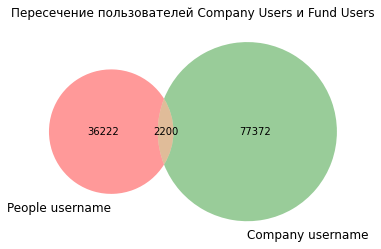

In [39]:
# Строим диаграмму Венна
venn2([set(ppl_df['network_username'].unique()), set(car_df['network_username'].unique())], set_labels=('People username', 'Company username'))

# Отображаем график
plt.title("Пересечение пользователей Company Users и Fund Users")
#plt.figure(figsize=(12,6))
plt.show() 

___
Количество дубликатов в датасете `company_and_rounds` меньше, чем в `people`. В обоих датасетах количество дубликатов существенное, но если в `company_and_rounds` дубликаты могут означать участие одних и тех же пользователей в  разных раундах финансирования, то дубликаты в `people` вызывает вопросы. 

Количество пересечений уникальных значений невелико - 2200. Помимо этого, сам характер данных столбца `network_username` для каждого датасета разный. Если в `people` столбец указывает никнейм **человека** в социальных сетях, то в `company_and_rounds` это никнейм **компании**. Конечно, отдельная личность может проводить инвестиционные действия в отношении каких либо стартапов, потому могут возникать пересечения в данных. Также и человек может выбрать для своего никнейма название какой либо компании. Но в датасете `people` хранится информация о людях\сотрудниках, а в `company_and_rounds` о инвестиционных действиях компаний. При объединении этих датасетов мы получим некорректный датасет.
___


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [40]:
# Проверим количество пустых значений
car_df.isna().sum()

company_ID                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [41]:
# Исследуем первые три строки датасета company_and_rounds
for i in range(3):
    print(car_df.loc[i])
    print()

company_ID                             1.0
name                              Wetpaint
category_code                          web
status                           operating
founded_at             2005-10-17 00:00:00
closed_at                              NaT
domain                    wetpaint-inc.com
network_username           BachelrWetpaint
country_code                           USA
investment_rounds                      0.0
funding_rounds                         3.0
funding_total                   39750000.0
milestones                             5.0
funding_round_id                     888.0
company_id                             1.0
funded_at              2005-10-01 00:00:00
funding_round_type                series-a
raised_amount                    5250000.0
pre_money_valuation                    0.0
participants                           2.0
is_first_round                         0.0
is_last_round                          1.0
Name: 0, dtype: object

company_ID                    

После анализа первых строк датасета, можно сделать предположение, что датасет `company_and_rounds` состоит из двух датасетов:
- первый датасет начинается со столбца `company_ID` и заканчивается на `milestones`. Это датасет, который хранил общую информацию о компаниях и ее раундах инвестирования и финансирования, `founded_at` является столбцом с датой открытия компании, следом за ней `closed_at` - указывает дату закрытия. Также указана общая сумма, которую  компания финансировала и т.д.
- второй датасет начинается со столбца `funding_round_id` и заканчивается на `is_last_round`. Датасет хранил информацию о самих финансированиях. Какой раунд финансирования, какая сумма, является ли раунд финансирования первым или последним, тип раунда финансирования.

Попробуем раздлить данный датасет на два  отдельных.

In [42]:
# Создадим новый датасет company
company_df = car_df.iloc[:,0:13]
company_df

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Создадим новый датасет rounds
rounds_df = car_df.iloc[:,13:]
rounds_df

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
217769,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


Проверим датасет `company_df` на полные дубликаты и удалим их

In [44]:
print(f'Количество полных дубликатов - {company_df.duplicated().sum()}')

Количество полных дубликатов - 21220


In [45]:
# Удаляем полные дубликаты
company_df = company_df.drop_duplicates()
company_df

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0
217469,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


In [46]:
# Сбросим индексы датасета
company_df = company_df.reset_index()
company_df

,index,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
196550,217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
196551,217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0
196552,217469,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


Уберем столбец со старыми индексами

In [47]:
company_df = company_df.iloc[:,1:]
company_df

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
196550,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
196551,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0
196552,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


___
После исследования датасета `company_and_rounds` получилось образовать два датасета `company` и `rounds`. 
___

<a id='3'></a>
## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [48]:
# Фильтруем датасет по указанным условиям
filtered_company = company_df[(company_df['funding_rounds'] > 0) | 
                               (company_df['investment_rounds'] > 0) | (company_df['status'] == 'acquired')]
filtered_company

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196544,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0
196545,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0
196549,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
196550,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0


Проверим полученный датасет: посмотрим на общую информацию и количество пропущенных значений в столбцах

In [49]:
# Проверим общую информацию о полученном датасете
filtered_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

In [50]:
# Количество пропущенных значений 
filtered_company.isna().sum()


company_ID               0
name                     0
category_code         5432
status                   0
founded_at           12940
closed_at            38619
domain                4993
network_username     19897
country_code          6005
investment_rounds        0
funding_rounds           0
funding_total            0
milestones               0
dtype: int64

In [51]:
# Количество пропущенных значений в относительном виде
filtered_company.isna().mean()

company_ID           0.000000
name                 0.000000
category_code        0.133310
status               0.000000
founded_at           0.317569
closed_at            0.947775
domain               0.122537
network_username     0.488306
country_code         0.147373
investment_rounds    0.000000
funding_rounds       0.000000
funding_total        0.000000
milestones           0.000000
dtype: float64

In [52]:
filtered_company['name'].nunique()

40747

Получилось отфильтровать датасет по указанным условиям. В датасете 40747. В столбце `closed_at` процент пропущенных значений состовляет почти 95%. Это может говорить о том, что почти все компании продолжают свою работу. Также возможны и другие причины пропущенных значений. Процент пропусков в столбце `network_username` в почти 49%, а в `founded_at` - почти 32%. Столбцы `category_code`,`domain` и `country_code` имеют процент пропусков меньше 15%.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [53]:
# Примерним метод describe для оценки разброса значений
filtered_company.describe()

,company_ID,investment_rounds,funding_rounds,funding_total,milestones
count,40747.000000,40747.000000,40747.000000,4.074700e+04,40747.000000
mean,110555.896140,0.150833,1.291531,1.013561e+07,0.803151
std,90388.070107,3.123291,1.264604,5.646436e+07,1.003431
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,33863.500000,0.000000,1.000000,0.000000e+00,0.000000
50%,69583.000000,0.000000,1.000000,6.000000e+05,1.000000
75%,184744.500000,0.000000,2.000000,5.650650e+06,1.000000
max,286215.000000,478.000000,15.000000,5.700000e+09,9.000000


В датасете во всех столбцах с типом `float64` значения имеют большоке количество цифр после запятой. Изменим формат отображения

In [54]:
# Меняем формат отображения десятичных чисел
pd.set_option('display.float_format', '{:.2f}'.format)

In [55]:
# Заново осмотрим данные
filtered_company.describe()

,company_ID,investment_rounds,funding_rounds,funding_total,milestones
count,40747.00,40747.00,40747.00,40747.00,40747.00
mean,110555.90,0.15,1.29,10135609.64,0.80
std,90388.07,3.12,1.26,56464359.98,1.00
min,1.00,0.00,0.00,0.00,0.00
25%,33863.50,0.00,1.00,0.00,0.00
50%,69583.00,0.00,1.00,600000.00,1.00
75%,184744.50,0.00,2.00,5650650.00,1.00
max,286215.00,478.00,15.00,5700000000.00,9.00


Привели десятичные значения к корректному формату. Можно отметить макисмальное число в столбце `funding_total`. Оно почти в 10 раз больше медианного значения в этом столбце. Аномальным его назвать  тоже нельзя. Вполне вероятно, что какая-нибудь компания за всё своё время могла вложиться в финансирование и инвестрирование на сумму в 5 миллиардов 700 миллионов долларов. Также непонятна информация с квартилями. 25% квартиль столбца `funding_total` составляет 0 долларов. Это может говорить о большом количестве нулевых значений в столбце. Посмотрим как часто повторяются значения в `fundint_total`

In [56]:
# Посмотрим на количество повторяющихся значений
filtered_company['funding_total'].value_counts()

0.00           12873
1000000.00       698
500000.00        523
100000.00        480
2000000.00       455
               ...  
11653200.00        1
1918090.00         1
1250200.00         1
2101770.00         1
3993020.00         1
Name: funding_total, Length: 9483, dtype: int64

12783 - столько нулевых значений в столбце. Возникновение подобных значений может быть разным. Возможно, компания никогда не проводила финансирование или причина появления нулевого значения имеет характер другого типа. Подобные значения будут сильно влиять на анализ данных.

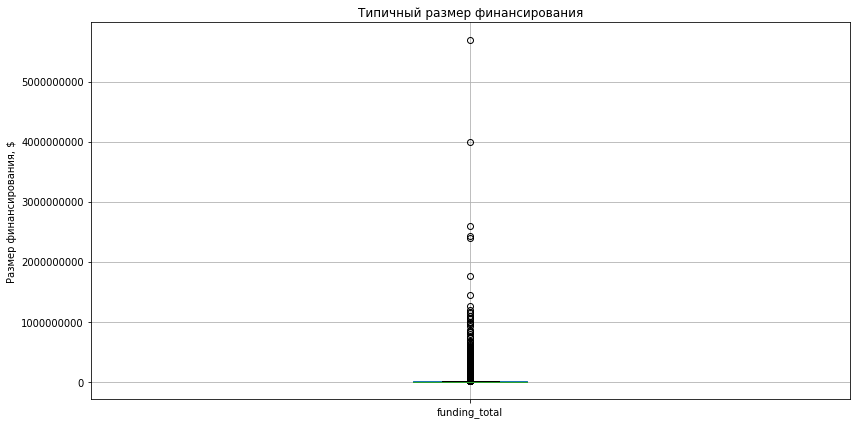

In [57]:
# Строим диаграмму размаха значений
boxplot = filtered_company.boxplot(column = 'funding_total',
                        grid=True,
                        figsize = (12,6),
                        )

boxplot.set_title('Типичный размер финансирования')
boxplot.set_ylabel('Размер финансирования, $')
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()

По диаграмме мало, что можно сказать из-за большого числа выбросов. Уберем их

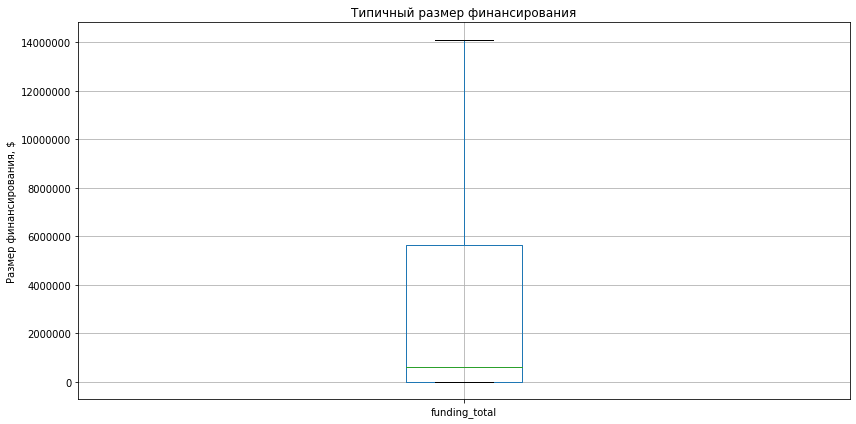

In [58]:
# Строим диаграмму размаха значений без выбросов
boxplot = filtered_company.boxplot(column = 'funding_total',
                        grid=True,
                        figsize = (12,6),
                        showfliers = False)

boxplot.set_title('Типичный размер финансирования')
boxplot.set_ylabel('Размер финансирования, $')
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()

Можно заметить правосимметричное распределение данных. Основной объем данных о суммах финансирования находится в диапозоне от 0 до ~5.700.000 долларов. Медианное значение находится на отметке ~500.000. Построим гистограмму, чтобы увидеть точнее разброс данных.  

Отфильтруем данные для построения гистрограммы по по верхнему квартилю, а также уберем нулевые значения `funding_total`

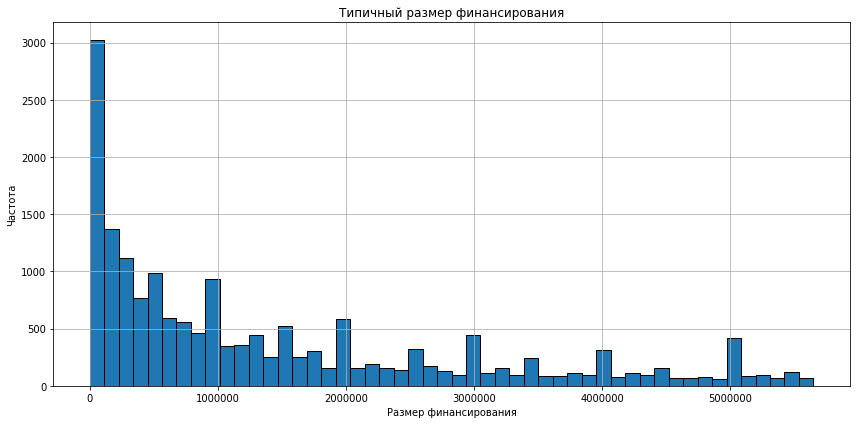

In [59]:
# Строим диаграмму по отфилтрованным данным
new_filtered_company = filtered_company[(filtered_company['funding_total'] > 0.00)&
                                        (filtered_company['funding_total'] <= filtered_company['funding_total'].quantile(0.75))]
hist = new_filtered_company.hist(column = 'funding_total',
                        figsize = (12,6),
                        edgecolor = 'black',
                        bins=50)
plt.title('Типичный размер финансирования')
plt.xlabel('Размер финансирования')
plt.ylabel('Частота')
plt.ticklabel_format(axis='x', style='plain')
plt.tight_layout()

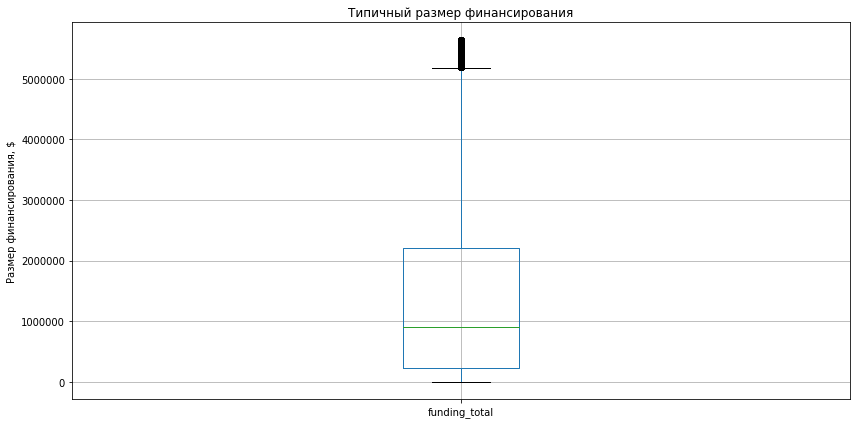

In [60]:
# Заново посмотрим на диаграмму размаха
boxplot = new_filtered_company.boxplot(column = 'funding_total',
                        grid=True,
                        figsize = (12,6),
                        showfliers = True)

boxplot.set_title('Типичный размер финансирования')
boxplot.set_ylabel('Размер финансирования, $')
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()

In [61]:
# Посмотрим на разброс данных через метод describe
new_filtered_company[['funding_total']].describe()

,funding_total
count,17687.00
mean,1440703.66
std,1507659.71
min,291.00
25%,230000.00
50%,900000.00
75%,2211000.00
max,5650000.00


___
По основному объему данныx можно сделать следующие выводы:
- Чаще всего размер общего финансирования для компании состовляет 900.000 тыс. долларов
- Основной объем данных приходится на отрезок 230.000 - 2.211.000 долларов.
- Наибольшим размером общего финансирования , рамках отфильтрованных от больших и искажающих анализ значений, является 5.650.000 долларов
- Наименьшим размером общего финансирования является 291 доллар.
___
Выводы основаны на данных, отфильтрованных от нулевых и больших, искажающих анализ значений. Выбросы которые демонстрируются на диаграмме размаха по отфильтрованному датасету `new_filtered_company` не являются таковыми. Основная задача была найти наиболее типичный размером общего финансирования, что трудно сделать без дополнительной фильтрации.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [62]:
# Посмотрим на данные датасета filtered_company
filtered_company

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
13,1001.00,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,5000000.00,3.00
18,10014.00,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196544,1344.00,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.00,1.00,10000000.00,0.00
196545,142181.00,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.00,1.00,500000.00,1.00
196549,3429.00,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,44000000.00,6.00
196550,7748.00,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,1300000.00,3.00


In [63]:
# Посмотрим на данные датасета acquisition
acq_df

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
...,...,...,...,...,...,...
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12


In [64]:
# Объеденим датасеты для дальшей для дальнейшего анализа
acquired_filtered_company = pd.merge(filtered_company,acq_df,left_on='company_ID',right_on='acquired_company_id',how='left')
acquired_filtered_company

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00,NaN,NaN,NaN,NaN,NaN,NaT
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00,1.00,11.00,10.00,NaN,20000000.00,2007-05-30
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00,20.00,377.00,100.00,cash,0.00,2005-05-29
3,1001.00,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,5000000.00,3.00,1901.00,5.00,1001.00,cash_and_stock,47500000.00,2009-08-10
4,10014.00,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00,3878.00,23054.00,10014.00,NaN,0.00,2010-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,1344.00,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.00,1.00,10000000.00,0.00,NaN,NaN,NaN,NaN,NaN,NaT
40886,142181.00,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.00,1.00,500000.00,1.00,NaN,NaN,NaN,NaN,NaN,NaT
40887,3429.00,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,44000000.00,6.00,NaN,NaN,NaN,NaN,NaN,NaT
40888,7748.00,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,1300000.00,3.00,NaN,NaN,NaN,NaN,NaN,NaT


In [65]:
# Отфильтруем по требуемой цене продажи 
acquired_filtered_company = acquired_filtered_company[(acquired_filtered_company['price_amount']==0)|
                                                      (acquired_filtered_company['price_amount']==1)]


In [66]:
# Проверим уникальные значения в столбце price_amount
acquired_filtered_company['price_amount'].unique()

array([0., 1.])

In [67]:
# Отфильтруем по ненулевому общему объёму финансирования
acquired_filtered_company = acquired_filtered_company[(acquired_filtered_company['funding_total'] > 0)]


In [68]:
# Проверим данные
acquired_filtered_company

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,121500000.00,3.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
63,101312.00,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.00,3.00,4000000.00,2.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
66,101340.00,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.00,1.00,250000.00,1.00,7272.00,1972.00,101340.00,NaN,0.00,2012-06-18
67,10137.00,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.00,3.00,1310000.00,2.00,8254.00,757.00,10137.00,cash_and_stock,0.00,2012-11-05
68,10139.00,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.00,2.00,44925000.00,1.00,9326.00,44008.00,10139.00,NaN,0.00,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,99.00,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.00,2.00,3900000.00,0.00,7024.00,317.00,99.00,NaN,0.00,2010-09-22
40836,9905.00,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.00,2.00,5172350.00,0.00,3381.00,41119.00,9905.00,NaN,0.00,2010-06-24
40840,992.00,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.00,1.00,10000000.00,1.00,9916.00,19182.00,992.00,NaN,0.00,2010-07-02
40854,997.00,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.00,1.00,14500000.00,3.00,9121.00,415.00,997.00,NaN,0.00,2013-07-15


In [69]:
# Получим краткое статистическое описание данных через метод describe 
acquired_filtered_company.describe()

,company_ID,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,price_amount
count,1618.00,1618.00,1618.00,1618.00,1618.00,1618.00,1618.00,1618.00,1618.00
mean,39632.81,0.01,1.89,18152961.94,1.46,6303.87,46063.28,39632.81,0.00
std,44615.51,0.12,1.24,144503027.47,1.23,2980.14,68220.70,44615.51,0.00
min,9.00,0.00,1.00,3750.00,0.00,14.00,5.00,9.00,0.00
25%,10491.75,0.00,1.00,2000000.00,0.00,3912.25,2720.25,10491.75,0.00
50%,27868.50,0.00,1.00,6000000.00,1.00,6799.00,18183.50,27868.50,0.00
75%,49818.75,0.00,2.00,15500000.00,2.00,8842.25,52739.75,49818.75,0.00
max,268806.00,3.00,12.00,5700000000.00,6.00,10513.00,284510.00,268806.00,0.00


Всего получилось 1618 строк датасета, подходящих под требуемые условия. Продолжим анализ.

In [70]:
# Начнём рассчитывать аналитические верхнюю и нижнюю границу выбросов для столбца funding_total
q1 = acquired_filtered_company['funding_total'].quantile(0.25)
q3 = acquired_filtered_company['funding_total'].quantile(0.75)
IQR = (q3 - q1) # межквартильный размах
IQR

13500000.0

In [71]:
# Нижняя граница 
bot_border = q1 - 1.5*IQR
# Верхняя граница
top_border = q3 + 1.5*IQR
print(f'Нижняя граница - {bot_border}, Верхняя граница - {top_border}')

Нижняя граница - -18250000.0, Верхняя граница - 35750000.0


Так как нижняя граница не может быть отрицательным числом, то возьмем за нижнюю границу значение 0. Также попробуем высчитать процентиль для верхней границы

In [72]:
# Берем за нижнюю границу значение 0
bot_border = max(0, bot_border)
bot_border

0

In [73]:
# Выберем все значения в столбце, которые меньше или равны верхней границы
new_value = acquired_filtered_company[acquired_filtered_company['funding_total'] <= top_border]

In [74]:
# Количество значений, которые меньше верхней границы
a = new_value['funding_total'].count()

In [75]:
# Считаем процентиль для верхней границы
top_border_percentile = (a/acquired_filtered_company['funding_total'].count())*100
top_border_percentile

90.91470951792337

___
- Расчёт границ выбросов показывает, что нижняя граница находится на отметке -18.250.000.0. Отрицательное значение может быть связано с большим разбросом данных.
- Из-за того, что нижняя граница, посчитаная с помощью межквартильного размаха, оказалась с отрицательным значением, было решено заменить значение нижней границы на значение 0
- Верхняя граница находится на отметке 35.750.000.0 и приимерно соответствует 90% - 91% процентилю
- 1618 компаний были приобретены за 0 или 1 доллар.
___


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [76]:
# Создаем новый датасет
acquired_company = pd.merge(filtered_company,acq_df,left_on='company_ID',right_on='acquired_company_id',how='left')

In [77]:
acquired_company

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00,NaN,NaN,NaN,NaN,NaN,NaT
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00,1.00,11.00,10.00,NaN,20000000.00,2007-05-30
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00,20.00,377.00,100.00,cash,0.00,2005-05-29
3,1001.00,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,5000000.00,3.00,1901.00,5.00,1001.00,cash_and_stock,47500000.00,2009-08-10
4,10014.00,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00,3878.00,23054.00,10014.00,NaN,0.00,2010-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,1344.00,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.00,1.00,10000000.00,0.00,NaN,NaN,NaN,NaN,NaN,NaT
40886,142181.00,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.00,1.00,500000.00,1.00,NaN,NaN,NaN,NaN,NaN,NaT
40887,3429.00,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,44000000.00,6.00,NaN,NaN,NaN,NaN,NaN,NaT
40888,7748.00,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,1300000.00,3.00,NaN,NaN,NaN,NaN,NaN,NaT


In [78]:
# Посмотрим на статистическую информацию по столбцу price_amount
acquired_company['price_amount'].describe()

count            9390.00
mean        393988145.31
std       26846244613.76
min                 0.00
25%                 0.00
50%                 0.00
75%             23625.50
max     2600000000000.00
Name: price_amount, dtype: float64

Из-за больших значений, искажающих анализ, отфильтруем данные про 90% процентилю по столбу `price_amount`, а также исключим цену в размере меньше единицы

In [79]:
# Фильтруем данные по 90% процентилю
acquired_company = acquired_company[(acquired_company['price_amount'] < acquired_company['price_amount'].quantile(0.9))&(acquired_company['price_amount'] > 1)]

In [80]:
acquired_company['price_amount'].describe()

count        1530.00
mean     30135297.04
std      30687941.12
min            11.00
25%       5000000.00
50%      20000000.00
75%      47875000.00
max     117500000.00
Name: price_amount, dtype: float64

In [81]:
# Сгруппируем компании по категориям и проведём подсчёт значений
grouped_filtered_company = acquired_company.groupby('category_code').agg(
                            typical_price_total=('price_amount','median'),
                            std_price_total=('price_amount','std'),
                            companys_in_category = ('name','count')).sort_values(
    by=['typical_price_total','std_price_total'],ascending=[False,False])
grouped_filtered_company

,typical_price_total,std_price_total,companys_in_category
category_code,,,
fashion,97500000.00,NaN,1
analytics,80000000.00,NaN,1
health,74500000.00,45218681.61,4
messaging,57500000.00,53674171.32,4
cleantech,51190000.00,34454635.54,14
photo_video,45000000.00,10593826.82,4
automotive,43000000.00,NaN,1
finance,40575000.00,37563868.82,8
real_estate,40000000.00,24758836.81,3


In [82]:
# Создадим новый столбец для сложения значений из столбцов typical_funding_total и std_funding_total
grouped_filtered_company['combined'] = grouped_filtered_company['typical_price_total'] + grouped_filtered_company['std_price_total']

In [83]:
# Отфильтруем датасет по количеству компаний в категории
grouped_filtered_company = grouped_filtered_company[grouped_filtered_company['companys_in_category'] > 15]
grouped_filtered_company.loc[:,['typical_price_total','std_price_total','companys_in_category']]

,typical_price_total,std_price_total,companys_in_category
category_code,,,
semiconductor,30200000.00,31184221.14,38
biotech,27950000.00,31645943.42,112
advertising,26350000.00,27636364.97,54
games_video,26300000.00,30602793.69,56
mobile,26200000.00,32314743.08,79
network_hosting,26150000.00,32743294.32,34
software,25000000.00,28330299.36,276
enterprise,22500000.00,29638414.88,69
other,22000000.00,26823115.04,45


Для того, чтобы вывести самые привлекательные компании было решено сложить два столбца `typical_funding_total` и `std_funding_total`, чтобы не пропустить высокие значения в одному из двух столбцов для каждой категории. Это позволило наиболее точно соблюсти условия отбора компаний по категориям, а не единичное выполнение одного из условий. Так, самым привлекательным является категория полупроводников - `semiconductor`. Категориями с самым большим числом компаний оказались `software` - 276 компаний, `web` - 168 компаний и `biotech` - 112 компаний


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [84]:
# Посмотри на уникальные значения столбца status
filtered_company['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [85]:
# Посмотри на количество уникальных значений столбца funding_rounds 
filtered_company['funding_rounds'].nunique()

16

In [86]:
# Посмотри на уникальные значения столбца funding_rounds 
filtered_company['funding_rounds'].unique()

array([ 3.,  0.,  1.,  5.,  2.,  7.,  4.,  6.,  8., 10.,  9., 13., 11.,
       15., 14., 12.])

In [87]:
# Сгруппируем данные по статусу компании и посчитаем среднее количество раундов финансирования
typical_rounds = filtered_company.groupby('status')['funding_rounds'].agg(['median',
                                                                           'mean']).sort_values(by='mean',ascending=False).reset_index()
typical_rounds

,status,median,mean
0,ipo,1.00,1.93
1,operating,1.00,1.52
2,closed,1.00,1.38
3,acquired,0.00,0.52


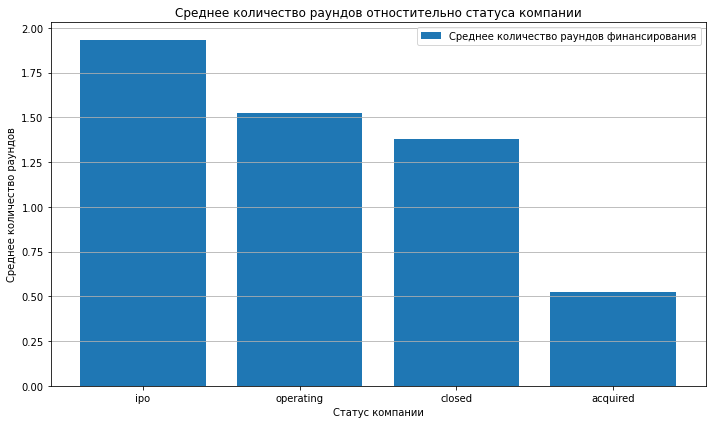

In [88]:
# Построим столбчатую диаграмму по данным среднего количества раундов относительно статуса компании
plt.figure(figsize=(10,6))

plt.bar(typical_rounds['status'],typical_rounds['mean'], label = 'Среднее количество раундов финансирования')

plt.xlabel('Статус компании')
plt.ylabel('Среднее количество раундов')
plt.title('Среднее количество раундов отностительно статуса компании')

plt.tight_layout()
plt.grid(axis='y')
plt.legend()

___
По столбчатой диаграмме можно увидеть,что для компаний, находящиеся в статусе IPO - первичное публичное размещение акций, проходило в среднем 2 рануда финансирования. Возможно, выход на IPO увеличивает уверенность инвесторов в стартапе, что приводит к увеличению финансирования.

Наименьшое количество раундов в среднем имеют компании в статусе acquired - то есть проданные компании. Возможно, это связано напрямую с покупкой самой компании\стартапа. Купленные компании не финансируются или не привлекают стороние инвестиции. Скорее всего такие компании уже финансируются напрямую их материнской компанией. 

Типичным количеством раундов финансирования для компаний является 1 раунд финансирования. Купленные компании чаще всего вовсе не финансируются.
___

<a id='4'></a>
## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В ходе исследования проанализировали данные о компаниях\стартапах.Для работы над проектом было предоставлено 5 датасетов:
о сотрудниках, о компаниях купившие другие компании\стартапы, об образовании, о степени образолвания и основной датасет изначально хранивший общую информацию о компаниях и раундов ее финансирования. Требовалось проанализировать имеющуюся информацию, чтобы понять, какие компании\стартапы будут привликательнее всего для их покупки, развития и дальнейшей перепродажи. 

Данные были неполны, поэтому выводы должны быть восприняты критически. 

В процессе работы основной датасет `company_and_rounds` подвергся значительному агрегированию. Помимо изменения типов данных некоторых столбцов, датасет был разделён на два отдельных датасета для комфортной работы над данными.


Результаты исследовательского анализа:
- Была отмечена тенденция на сокрящение суммы финансирования. При этом количество инвестиционных раундов продолжало увеличиватся. 
- Над большинством стартапов работают команды из одного человека.
- Чем больше становится команда, тем нужнее становятся люди с подтвержденным образованием.
- Чаще всего размер общего финансирования для компании состовляет 900.000 тыс. долларов
- Основной объем данных о финансировании приходится на отрезок 230.000 - 2.211.000 долларов.
- 1618 компаний были приобретены за 0 или 1 доллар, при ненулевом объёме финансирования.
- Самой привлекательной, относительно наибольшего размаха финансирования и типичной высокой ценой, категорией компаний является `semiconductor` или разработка полупроводников. Также привлекательны могут быть компании занимающиеся биотехнологиями, программным обеспечением или Web-технологиями.
- Компании или стартапы, вышедшие на IPO, получают в среднем больше раундов финансирования. Купленные компании или стартапы финансирования практически не имеют.
- Чаще всего компании участвуют в одном раунде финансирования
- Наибольшей суммой финасирования компании является 5.700.000.000 долларов
 
 
Проанализированные данные не предоставляют возможности создать идеальную формулу по выбору компаний для покупки, развития и перепродажи.В качестве отправной точки, возможно, стоить обратить внимание на компании относящиеся к разработке полупроводников. Выход компании на IPO увеличивает финансирование и интерес инвесторов к компании. Покупка компаний, которые планируют выход на IPO может быть как выгодной, так и рискованной стратегией.